# Proyecto 2-Parte I (Core)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils


In [2]:
data = pd.read_csv('../datasets/2-gym_members_exercise_tracking.csv')

In [3]:
data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

Verificamos si existen duplicados

In [5]:
duplicados = data.duplicated() # Identificar duplicados
num_duplicados = duplicados.sum() # Contar el número de duplicados
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


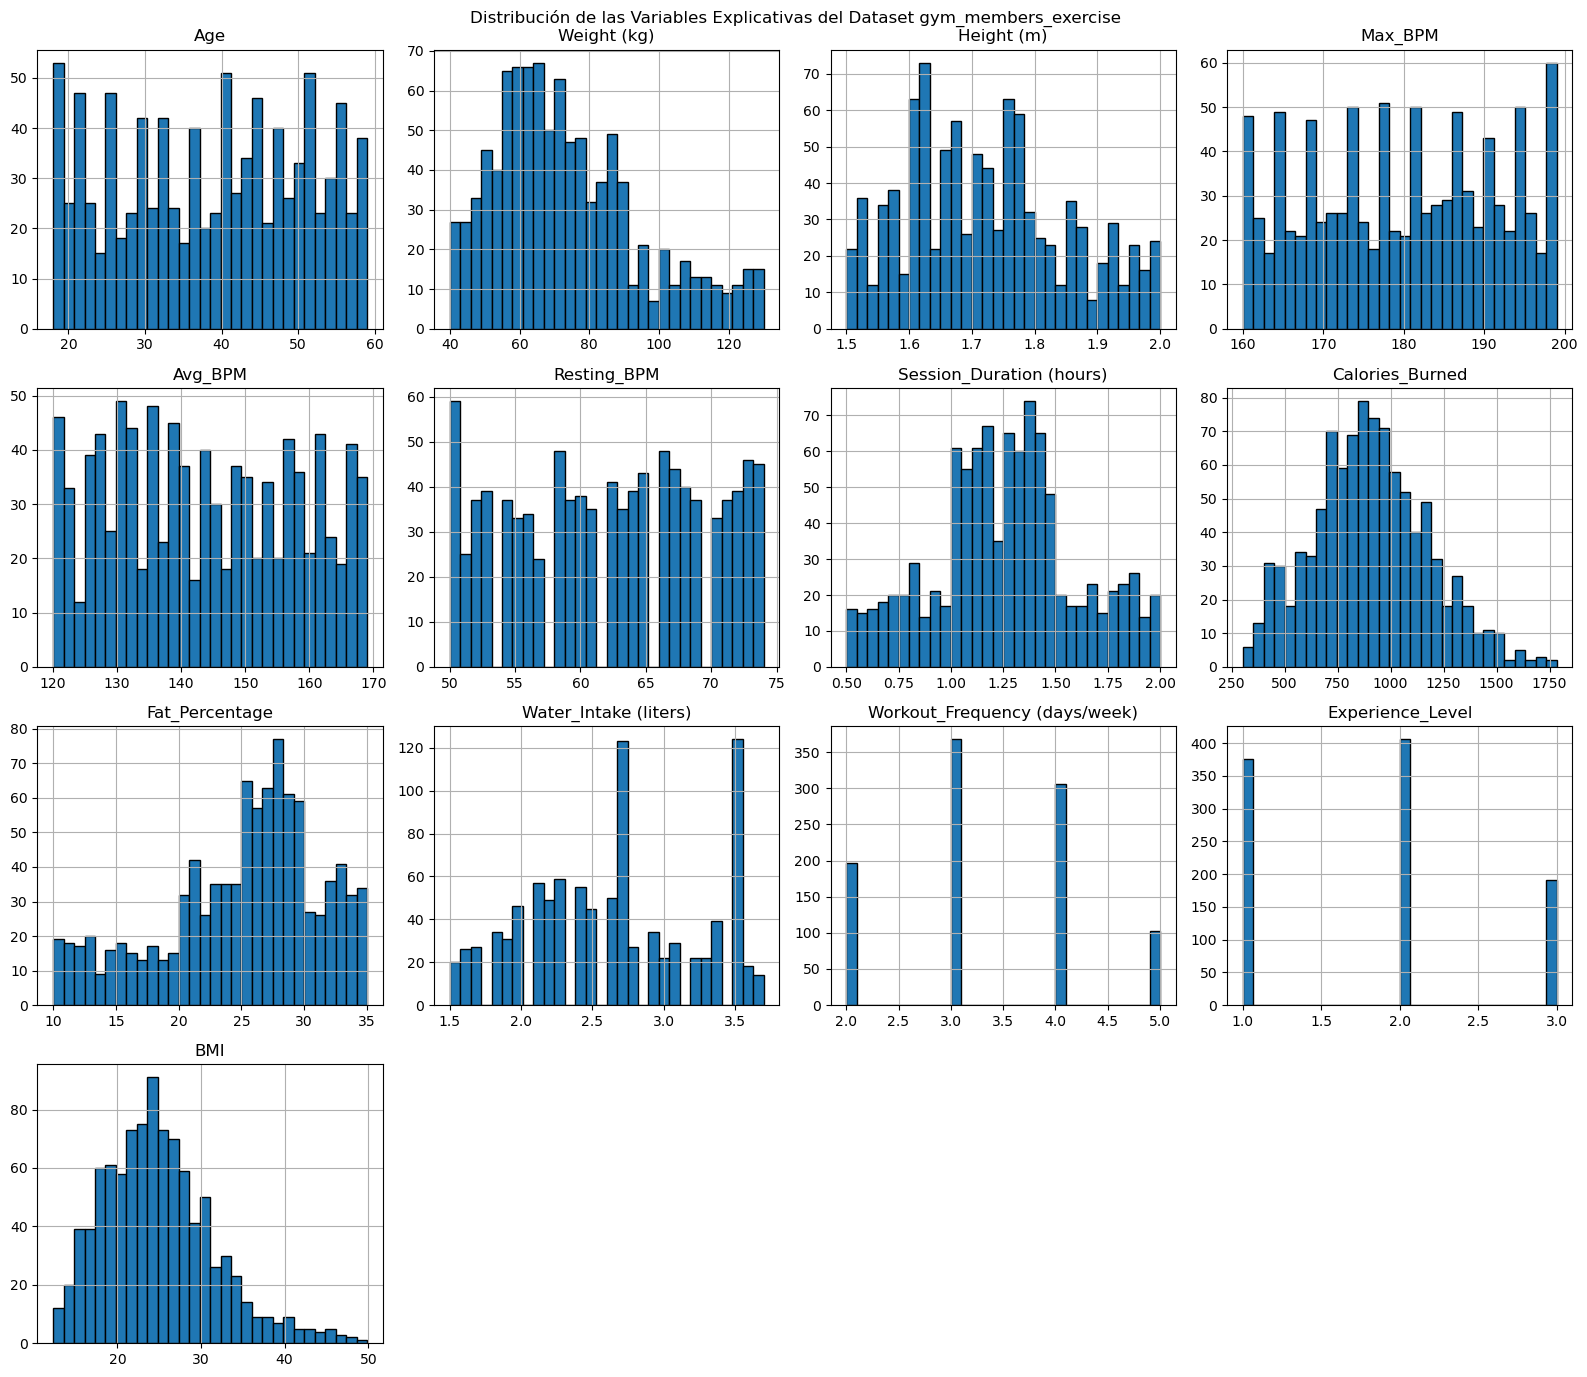

In [6]:
# Crear histogramas para cada característica
data.hist(bins=30, figsize=(16, 14), edgecolor='black')
plt.suptitle('Distribución de las Variables Explicativas del Dataset gym_members_exercise')
plt.tight_layout()
plt.show()

Separamos las variables categoricas y numericas para mejor control

In [7]:
# Seleccionar las columnas categoricas
categorical_columns = data.select_dtypes(include=['object', 'category', 'bool'])
# Seleccionar las columnas numéricas
numerical_columns = data.select_dtypes(include=[np.number])

Consistencia en valores categoricos

In [8]:
data_dict_category = {
    'Gender': 'category',
    'Workout_Type': 'category'
}
# Convertir tipos de datos según el diccionario
for column, dtype in data_dict_category.items():
    categorical_columns[column] = categorical_columns[column].astype(dtype, errors='ignore')
categorical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Gender        973 non-null    category
 1   Workout_Type  973 non-null    category
dtypes: category(2)
memory usage: 2.3 KB


Limpiamos las columnas categoricas, nos aseguramos de quitar mayusculas y cualquier caracter invalido

In [9]:
# Aplicar la limpieza a las columnas categóricas
for col in categorical_columns:
    categorical_columns[col] = categorical_columns[col].apply(utils.limpiar_cadena)
# Verificar los cambios
for col in categorical_columns:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(categorical_columns[col].unique())


Valores únicos después de limpieza en 'Gender':
['male', 'female']
Categories (2, object): ['female', 'male']

Valores únicos después de limpieza en 'Workout_Type':
['yoga', 'hiit', 'cardio', 'strength']
Categories (4, object): ['cardio', 'hiit', 'strength', 'yoga']


Verificamos que esten todos correctos

In [10]:
# Ejecutar la validación
mismatches = utils.validar_tipos(categorical_columns, data_dict_category)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Todos los tipos de datos son correctos.


Vemos si existen NaN en las columnas categoricas

In [11]:
utils.calculate_na_statistics(categorical_columns)

,datos sin NAs en q,Na en q,Na en %
Gender,973,0,0.0
Workout_Type,973,0,0.0


Consistencia en valores numericos

In [12]:
data_dict_numeric = {
    'Age': 'int',
    'Weight (kg)': 'float',
    'Height (m)': 'float',
    'Max_BPM': 'int',
    'Avg_BPM': 'int',
    'Resting_BPM': 'int',
    'Session_Duration (hours)': 'float',
    'Calories_Burned': 'int',
    'Fat_Percentage': 'float',
    'Water_Intake (liters)': 'float',
    'Workout_Frequency (days/week)': 'int',
    'Experience_Level': 'int',
    'BMI': 'float'
}
# Convertir tipos de datos según el diccionario
for column, dtype in data_dict_numeric.items():
    numerical_columns[column] = numerical_columns[column].astype(dtype, errors='ignore')
numerical_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int32  
 1   Weight (kg)                    973 non-null    float64
 2   Height (m)                     973 non-null    float64
 3   Max_BPM                        973 non-null    int32  
 4   Avg_BPM                        973 non-null    int32  
 5   Resting_BPM                    973 non-null    int32  
 6   Session_Duration (hours)       973 non-null    float64
 7   Calories_Burned                973 non-null    int32  
 8   Fat_Percentage                 973 non-null    float64
 9   Water_Intake (liters)          973 non-null    float64
 10  Workout_Frequency (days/week)  973 non-null    int32  
 11  Experience_Level               973 non-null    int32  
 12  BMI                            973 non-null    flo

Limpiamos las columnas numericas

In [13]:
for col in numerical_columns:
    numerical_columns[col] = numerical_columns[col].apply(utils.limpiar_cadena)
# Verificar los cambios
for col in numerical_columns:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(numerical_columns[col].unique())


Valores únicos después de limpieza en 'Age':
[56 46 32 25 38 36 40 28 41 53 57 20 39 19 47 55 50 29 42 44 59 45 33 54
 24 26 35 21 31 43 37 52 34 23 51 27 48 58 18 22 30 49]

Valores únicos después de limpieza en 'Weight (kg)':
[ 88.3  74.9  68.1  53.2  46.1  58.   70.3  69.7 121.7 101.8 120.8  51.7
 112.5  94.5 117.7  42.5  64.   43.8  66.8  75.2  89.   71.9  71.  120.9
  64.3  63.7  65.2  53.9  84.9  78.  108.2  65.4  50.2  58.9  81.4 127.6
  59.3  96.9  62.6  45.5  48.8  44.3 113.2  60.5 124.2  52.4  54.7  88.1
  59.7  79.7  51.   84.2 122.1  96.7  73.  114.8  65.5  50.3  61.   44.6
  58.2  44.8  87.5  51.8  64.4  67.1  85.9  61.1 106.5  61.4  40.5  70.1
  94.1  55.5  53.7  66.1 103.9  61.7  52.3  59.5  72.9  76.7  72.1  54.8
 105.   55.   81.6  75.6  81.5  61.5  74.   56.4 102.6  54.6 129.  103.5
  59.4  60.1  77.7  41.2  58.6 109.3  69.6  56.2  71.7  86.   79.4  78.4
  55.4  85.5  87.6  82.4  67.   42.3  82.7  92.4  63.2  86.6 129.5  98.
  86.2  78.6  59.   57.3 122.3  85.3  45.2

Verificamos si existen NaN en las columnas numericas

In [14]:
utils.calculate_na_statistics(numerical_columns)

,datos sin NAs en q,Na en q,Na en %
Age,973,0,0.0
Weight (kg),973,0,0.0
Height (m),973,0,0.0
Max_BPM,973,0,0.0
Avg_BPM,973,0,0.0
Resting_BPM,973,0,0.0
Session_Duration (hours),973,0,0.0
Calories_Burned,973,0,0.0
Fat_Percentage,973,0,0.0
Water_Intake (liters),973,0,0.0


Graficamos boxplots para identificar los posibles Outliers

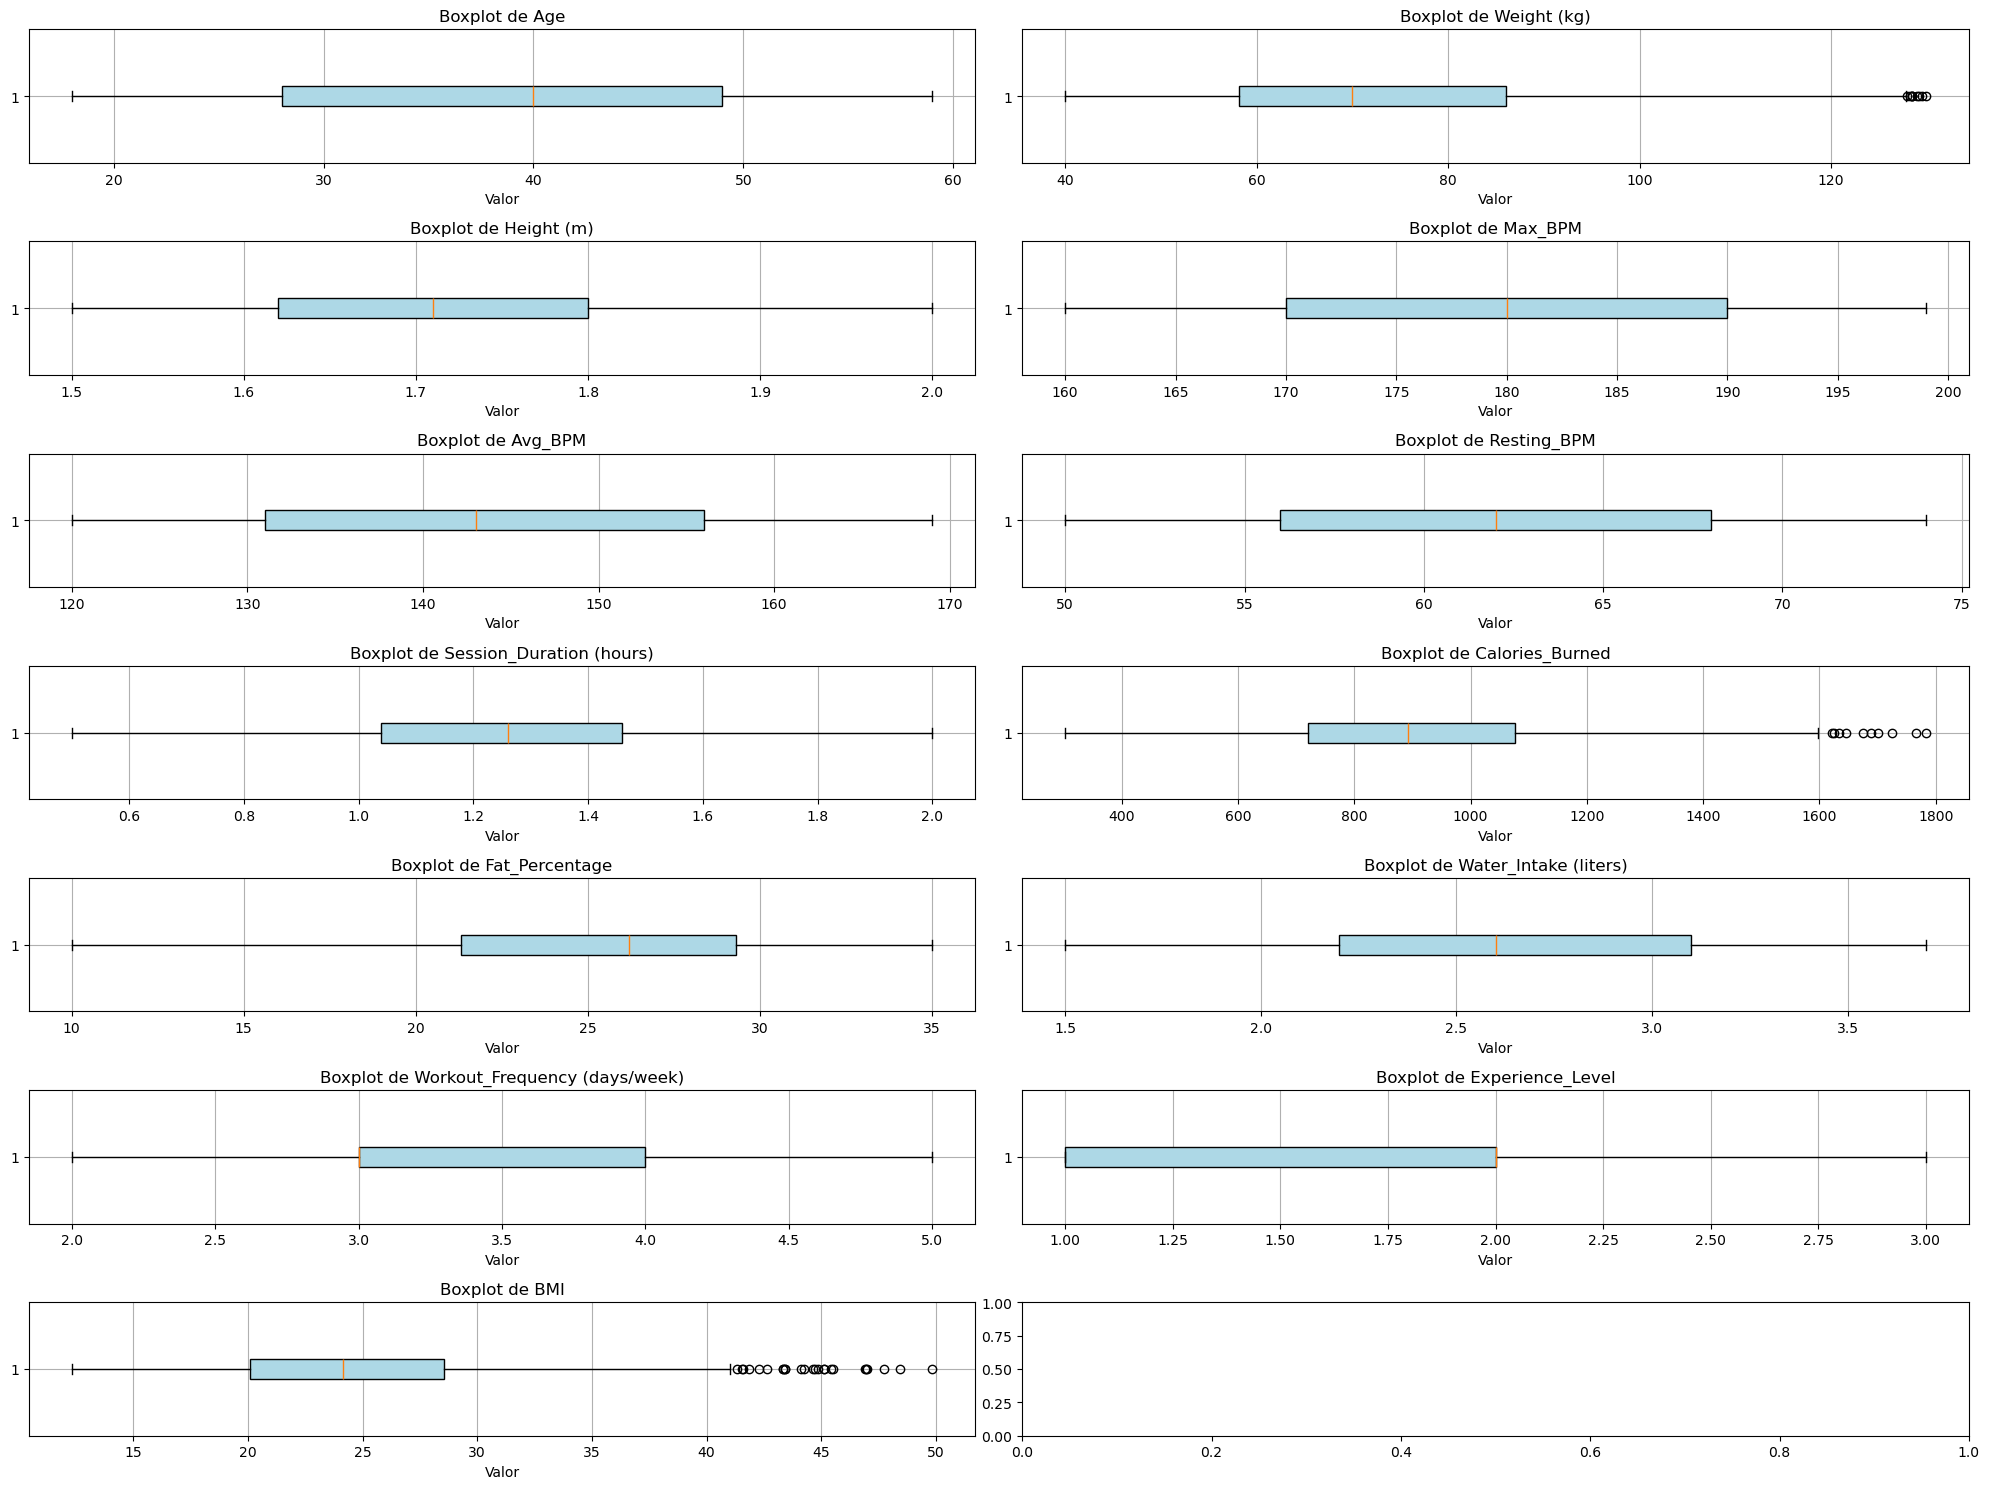

In [15]:
# Crear gráficos de boxplot separados para cada característica
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(20, 15))
axes = axes.flatten()

# Graficar cada variable en un boxplot separado
for i, col in enumerate(numerical_columns.columns):
    axes[i].boxplot(numerical_columns[col], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f'Boxplot de {col}'),
    axes[i].set_xlabel('Valor')
    axes[i].grid()

# Ajustar el diseño
plt.tight_layout()
plt.show()

Calculamos los porcentajes de Outliers

In [16]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number])
# Create a summary DataFrame for outliers
outliers_summary = pd.DataFrame()
for column in numerical_columns:
    outliers = utils.detect_outliers_iqr(data[column])
    outliers_summary[column] = {
        'Number of Outliers': outliers.sum(),
        'Percentage of Outliers': 100 * outliers.mean(),
        'Lower Bound': data[column][~outliers].min(),
        'Upper Bound': data[column][~outliers].max()
    }

# Save the summary to a CSV file
outliers_summary.T

,Number of Outliers,Percentage of Outliers,Lower Bound,Upper Bound
Age,0.0,0.000000,18.00,59.00
Weight (kg),9.0,0.924974,40.00,127.80
Height (m),0.0,0.000000,1.50,2.00
Max_BPM,0.0,0.000000,160.00,199.00
Avg_BPM,0.0,0.000000,120.00,169.00
Resting_BPM,0.0,0.000000,50.00,74.00
Session_Duration (hours),0.0,0.000000,0.50,2.00
Calories_Burned,10.0,1.027749,303.00,1598.00
Fat_Percentage,0.0,0.000000,10.00,35.00
Water_Intake (liters),0.0,0.000000,1.50,3.70


Analizamos las columnas con outliers


📊 Análisis de Distribución para BMI
--------------------------------------------------

🔍 Estadísticos Descriptivos:
- Media: 24.9121
- Mediana: 24.1600
- Desv_est: 6.6609
- Asimetria: 0.7636
- Kurtosis: 0.7432
- Min: 12.3200
- Max: 49.8400

📈 Pruebas de Distribución:
- Normal: p-valor = 0.0000
- Exponencial: p-valor = 0.0000
- Uniforme: p-valor = 0.0000
- Log-Normal: p-valor = 0.0000
- Gamma: p-valor = 0.3684
- Weibull: p-valor = 0.4309

⚖️ Características de Distribución:
- Asimetría positiva (cola hacia la derecha)
- Distribución leptocúrtica (más puntiaguda)

🏆 Mejor distribución: Weibull


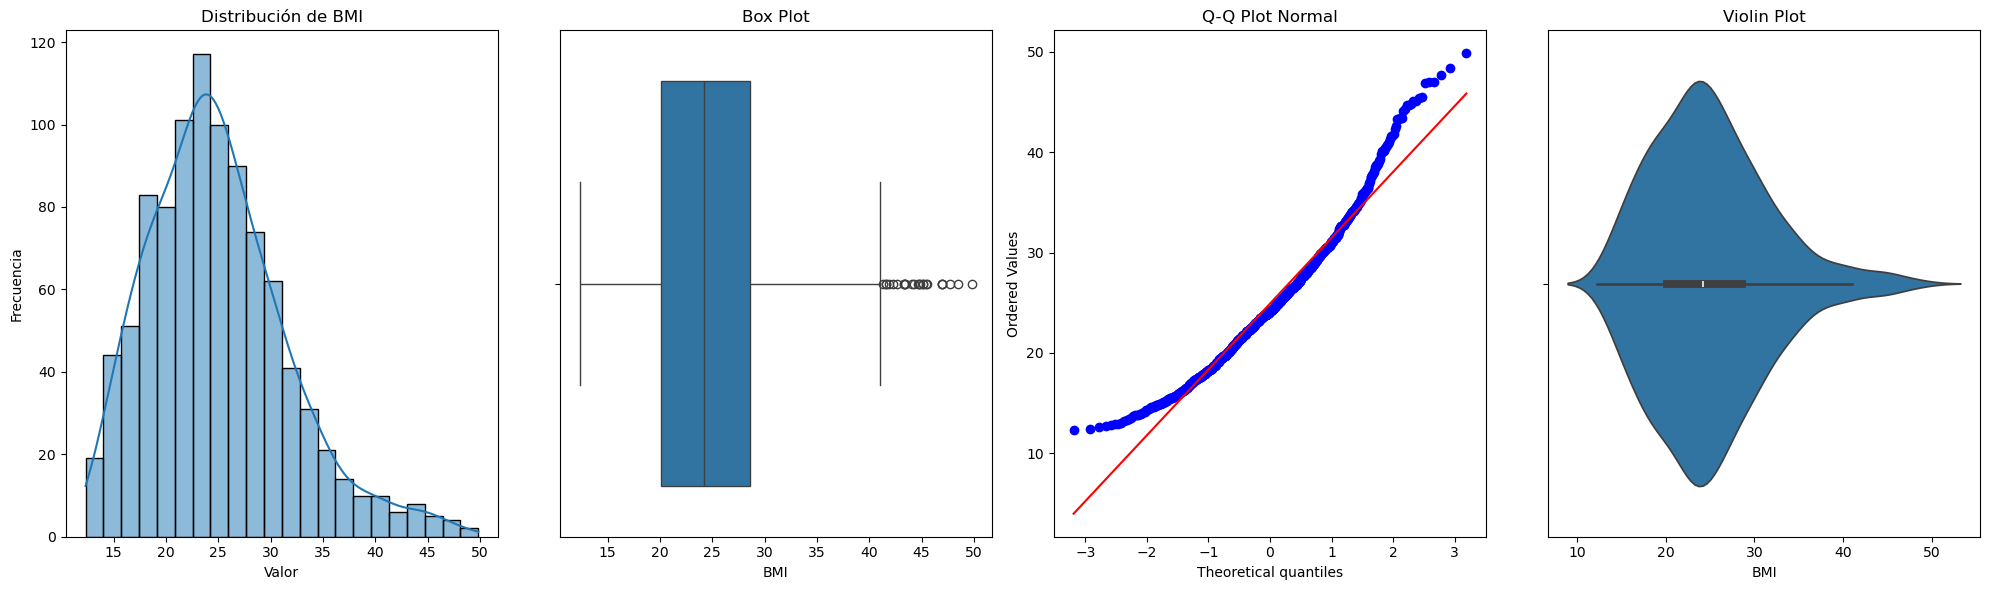

In [17]:
resultados = utils.analizar_distribucion_avanzada(data['BMI'], 'BMI')


📊 Análisis de Distribución para Calories_Burned
--------------------------------------------------

🔍 Estadísticos Descriptivos:
- Media: 905.4224
- Mediana: 893.0000
- Desv_est: 272.6415
- Asimetria: 0.2783
- Kurtosis: -0.0560
- Min: 303.0000
- Max: 1783.0000

📈 Pruebas de Distribución:
- Normal: p-valor = 0.0000
- Exponencial: p-valor = 0.0000
- Uniforme: p-valor = 0.0000
- Log-Normal: p-valor = 0.0000
- Gamma: p-valor = 0.4551
- Weibull: p-valor = 0.5512

⚖️ Características de Distribución:
- Distribución aproximadamente simétrica
- Distribución mesocúrtica (similar a normal)

🏆 Mejor distribución: Weibull


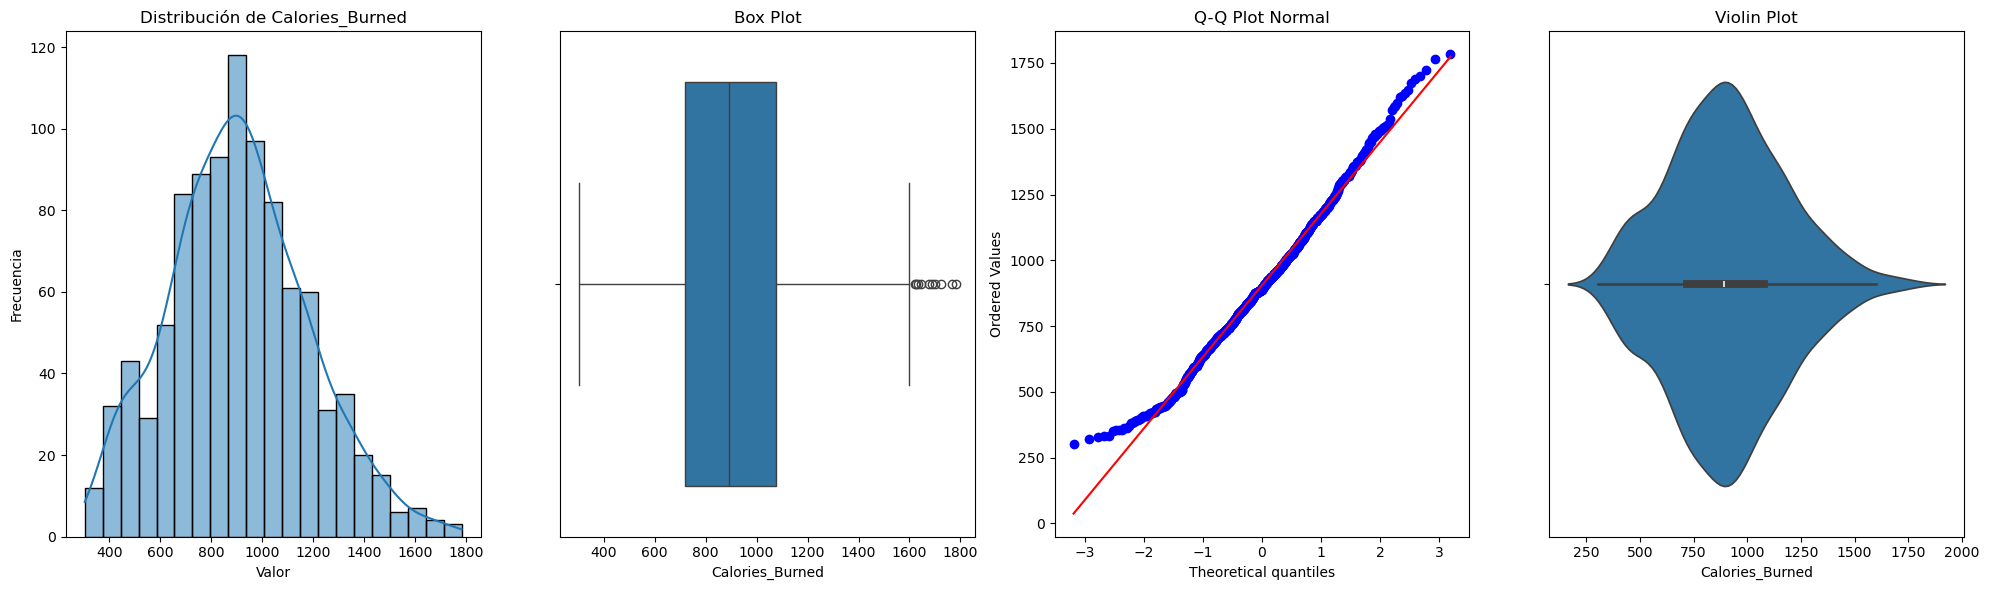

In [18]:
resultados = utils.analizar_distribucion_avanzada(data['Calories_Burned'], 'Calories_Burned')


📊 Análisis de Distribución para Weight (kg)
--------------------------------------------------

🔍 Estadísticos Descriptivos:
- Media: 73.8547
- Mediana: 70.0000
- Desv_est: 21.2075
- Asimetria: 0.7724
- Kurtosis: -0.0240
- Min: 40.0000
- Max: 129.9000

📈 Pruebas de Distribución:
- Normal: p-valor = 0.0000
- Exponencial: p-valor = 0.0000
- Uniforme: p-valor = 0.0000
- Log-Normal: p-valor = 0.0000
- Gamma: p-valor = 0.5521
- Weibull: p-valor = 0.5124

⚖️ Características de Distribución:
- Asimetría positiva (cola hacia la derecha)
- Distribución mesocúrtica (similar a normal)

🏆 Mejor distribución: Gamma


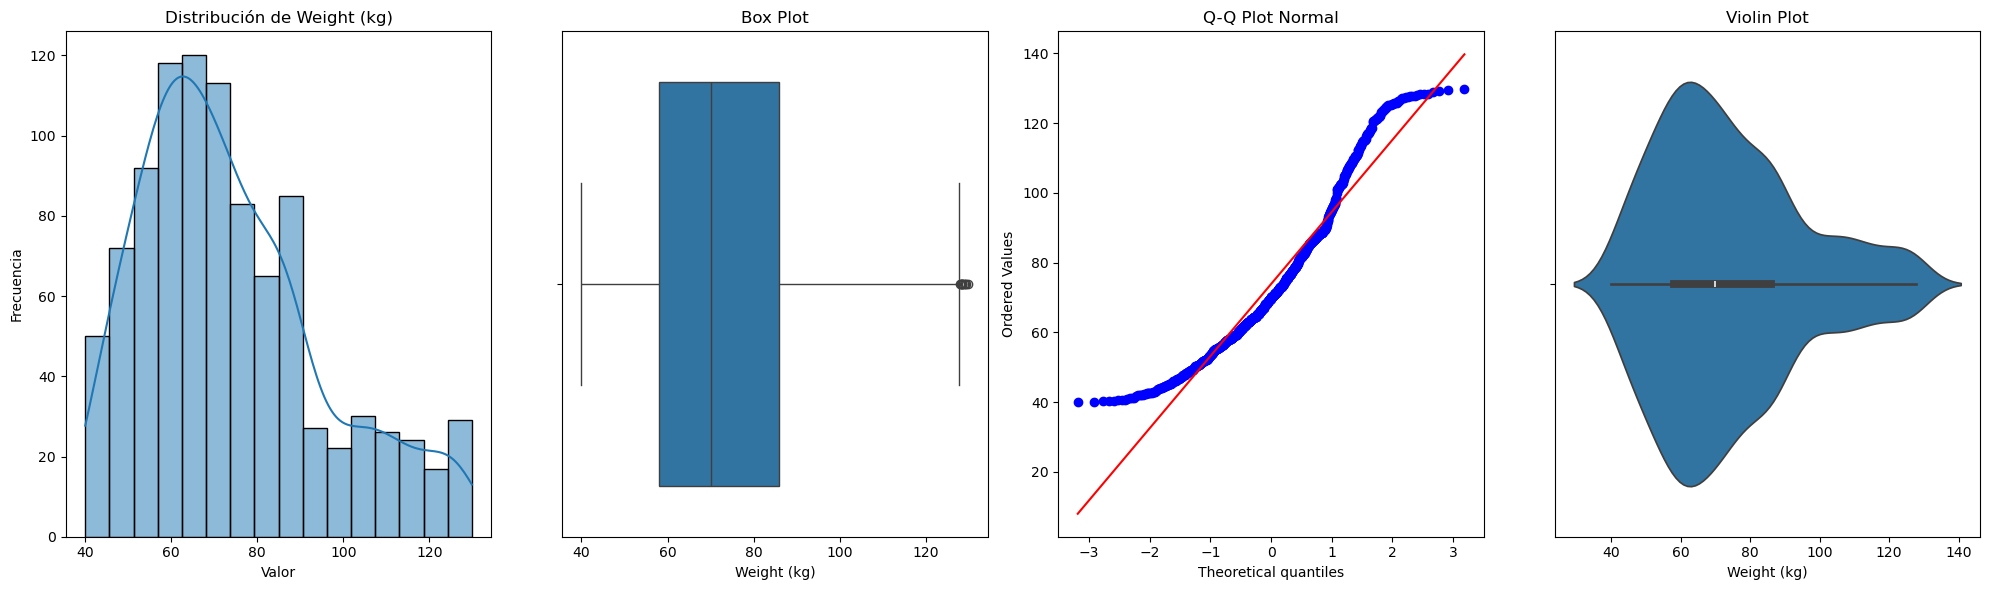

In [19]:
resultados = utils.analizar_distribucion_avanzada(data['Weight (kg)'], 'Weight (kg)')

Despues de analizar los outliers decido no imputar nada. Puede que sean valores extremos por condiciones extremas

In [20]:
# Crear un diccionario para almacenar las estadísticas
estadisticas_dict = {}
# Iterar sobre cada columna numérica y calcular las estadísticas
for columna in numerical_columns:
    datos_columna = data[columna].values
    estadisticas = utils.calcular_estadisticas(columna, datos_columna)
    estadisticas_dict[columna] = estadisticas
# Convertir el diccionario a un DataFrame para una mejor visualización
estadisticas_df = pd.DataFrame(estadisticas_dict).T  # Transponer para que las columnas sean las filas
estadisticas_df = estadisticas_df[['Cuenta', 'Media', 'Mediana', 'Desviación Estándar', 
                                   'Mínimo', 'Máximo', '25% Percentil', '75% Percentil']]
# Redondear las estadísticas a 2 decimales
estadisticas_df = estadisticas_df.round(2)
# Mostrar el DataFrame formateado
print("\nEstadísticas Descriptivas (Redondeadas a 2 decimales):")
estadisticas_df


Estadísticas Descriptivas (Redondeadas a 2 decimales):


,Cuenta,Media,Mediana,Desviación Estándar,Mínimo,Máximo,25% Percentil,75% Percentil
Age,973.0,38.68,40.00,12.18,18.00,59.00,28.00,49.00
Weight (kg),973.0,73.85,70.00,21.21,40.00,129.90,58.10,86.00
Height (m),973.0,1.72,1.71,0.13,1.50,2.00,1.62,1.80
Max_BPM,973.0,179.88,180.00,11.53,160.00,199.00,170.00,190.00
Avg_BPM,973.0,143.77,143.00,14.35,120.00,169.00,131.00,156.00
Resting_BPM,973.0,62.22,62.00,7.33,50.00,74.00,56.00,68.00
Session_Duration (hours),973.0,1.26,1.26,0.34,0.50,2.00,1.04,1.46
Calories_Burned,973.0,905.42,893.00,272.64,303.00,1783.00,720.00,1076.00
Fat_Percentage,973.0,24.98,26.20,6.26,10.00,35.00,21.30,29.30
Water_Intake (liters),973.0,2.63,2.60,0.60,1.50,3.70,2.20,3.10


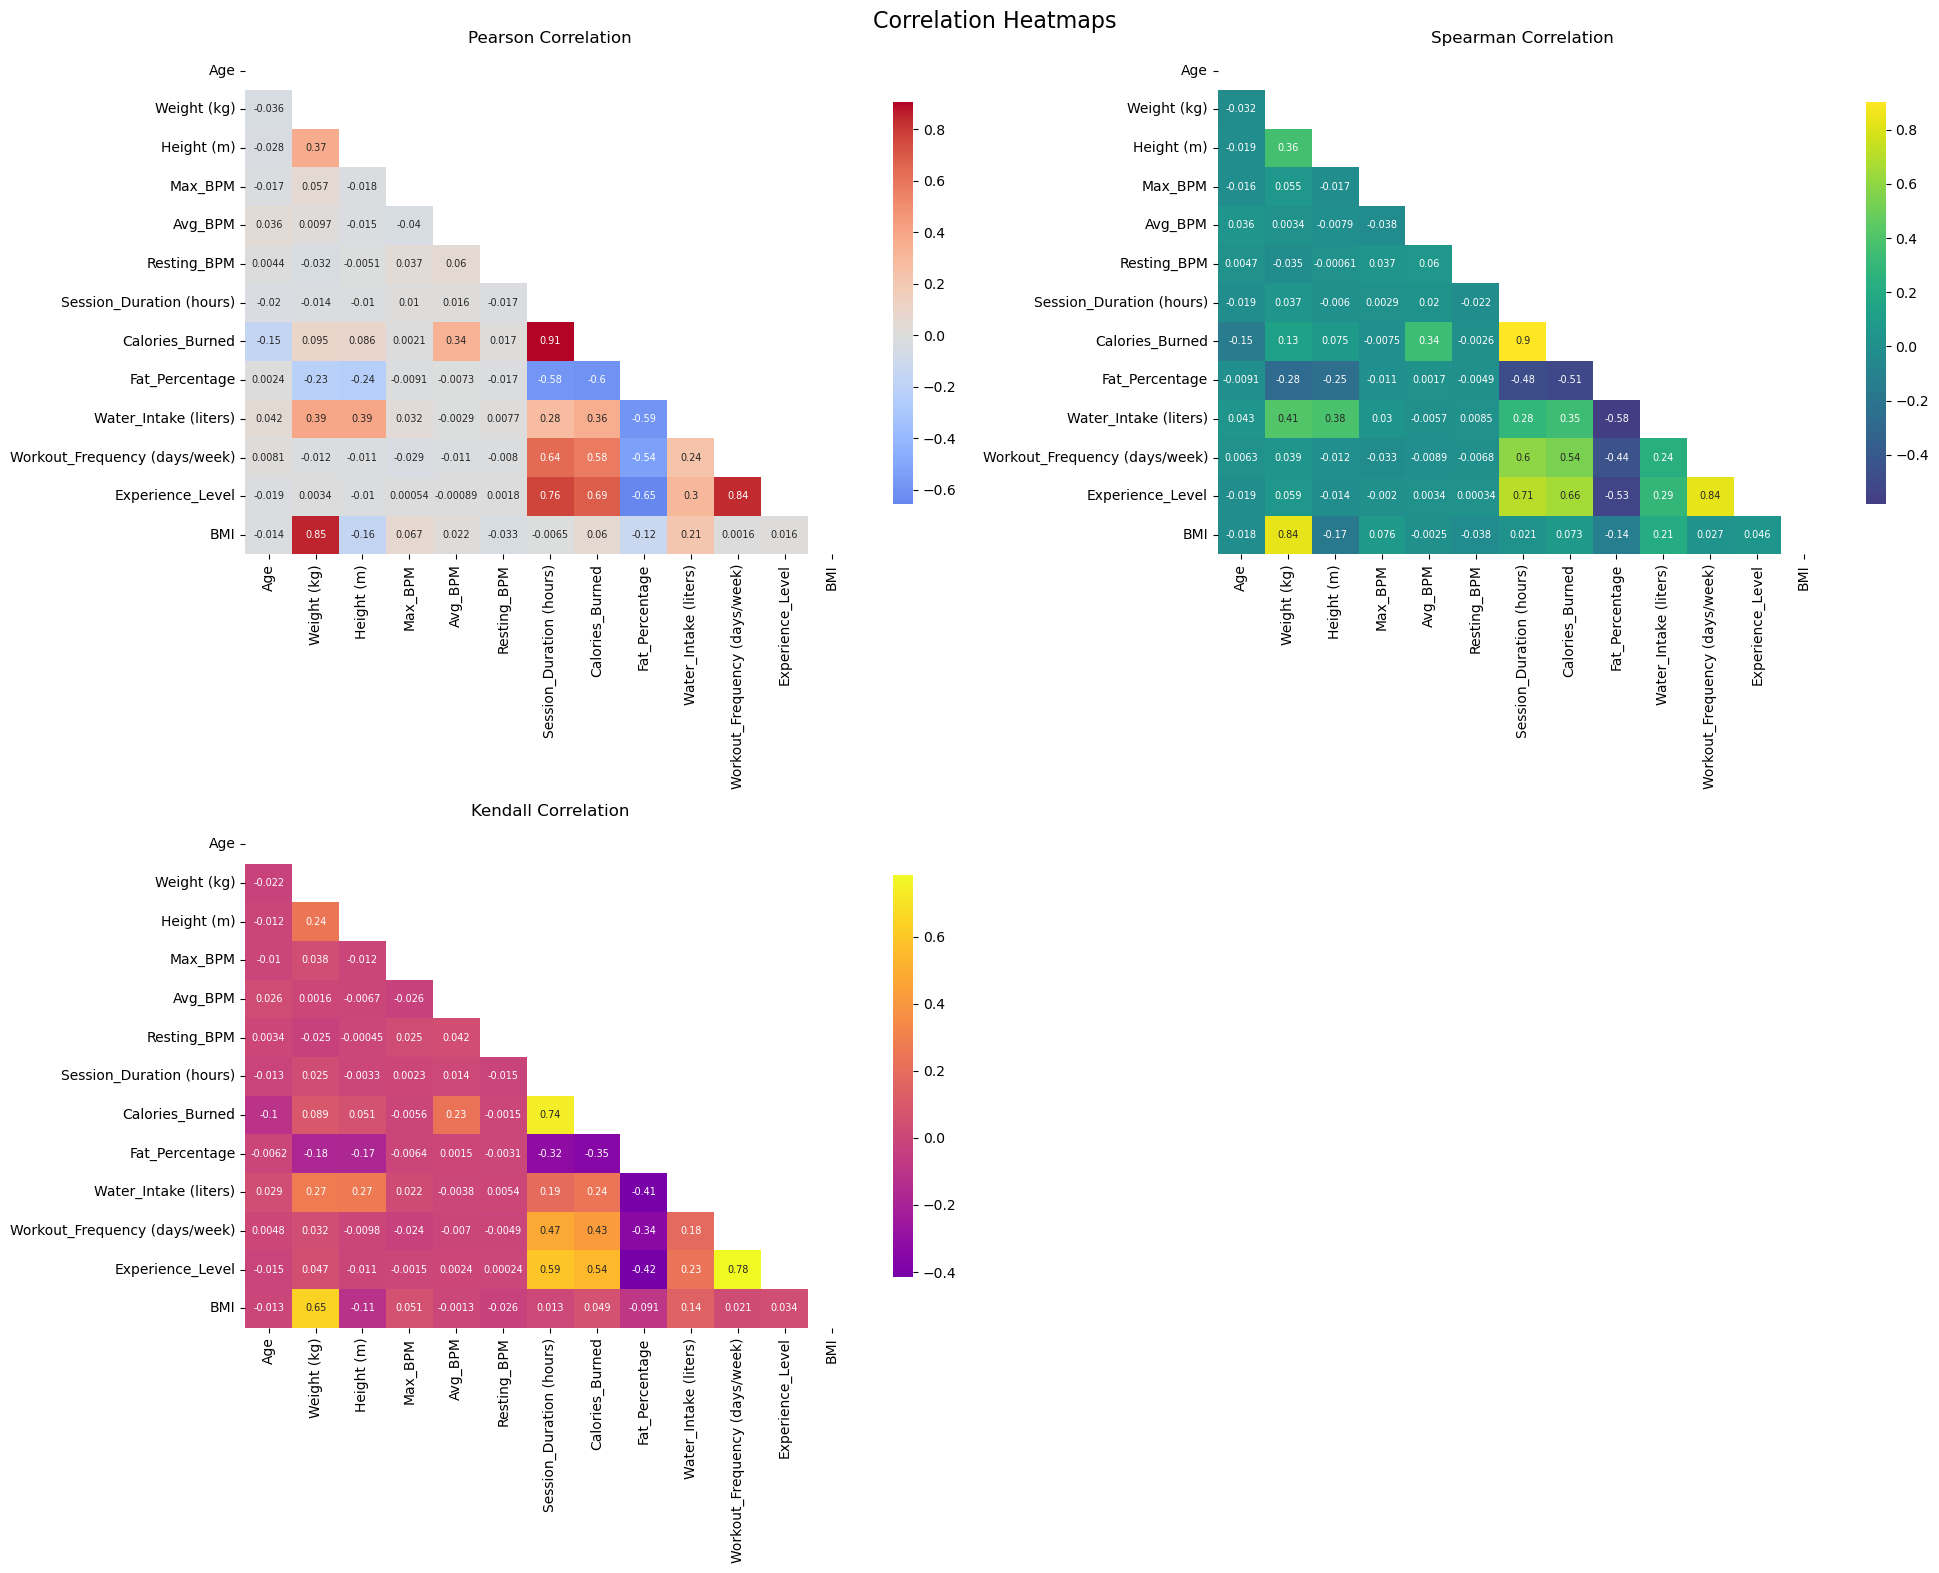

In [21]:
pearson_corr = numerical_columns.corr(method='pearson')
spearman_corr = numerical_columns.corr(method='spearman')
kendall_corr = numerical_columns.corr(method='kendall')

utils.graph_correlations(
    pearson_corr, 
    spearman_corr, 
    kendall_corr, 
    title="Correlation Heatmaps", 
    figsize=(20, 16),
    annot_size=7
)

Graficos Univariados

In [22]:
df_grouped2 = data.groupby(['Gender', 'Workout_Type']).count()
df_grouped2

Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  \
Gender Workout_Type                                                   
Female Cardio        126          126         126      126      126   
       HIIT          107          107         107      107      107   
       Strength      123          123         123      123      123   
       Yoga          106          106         106      106      106   
Male   Cardio        129          129         129      129      129   
       HIIT          114          114         114      114      114   
       Strength      135          135         135      135      135   
       Yoga          133          133         133      133      133   

                     Resting_BPM  Session_Duration (hours)  Calories_Burned  \
Gender Workout_Type                                                           
Female Cardio                126                       126              126   
       HIIT                  107                       107              107   
       Strength              123                       123              123   
       Yoga                  106                       106              106   
Male   Cardio                129                       129              129   
       HIIT                  114                       114              114   
       Strength              135                       135              135   
       Yoga                  133                       133              133   

                     Fat_Percentage  Water_Intake (liters)  \
Gender Workout_Type                                          
Female Cardio                   126                    126   
       HIIT                     107                    107   
       Strength                 123                    123   
       Yoga                     106                    106   
Male   Cardio                   129                    129   
       HIIT                     114                    114   
       Strength                 135                    135   
       Yoga                     133                    133   

                     Workout_Frequency (days/week)  Experience_Level  BMI  
Gender Workout_Type                                                        
Female Cardio                                  126               126  126  
       HIIT                                    107               107  107  
       Strength                                123               123  123  
       Yoga                                    106               106  106  
Male   Cardio                                  129               129  129  
       HIIT                                    114               114  114  
       Strength                                135               135  135  
       Yoga                                    133               133  133

Text(0.5, 1.0, 'Peso promedio por tipo de ejercicio y BMI separados por Genero')

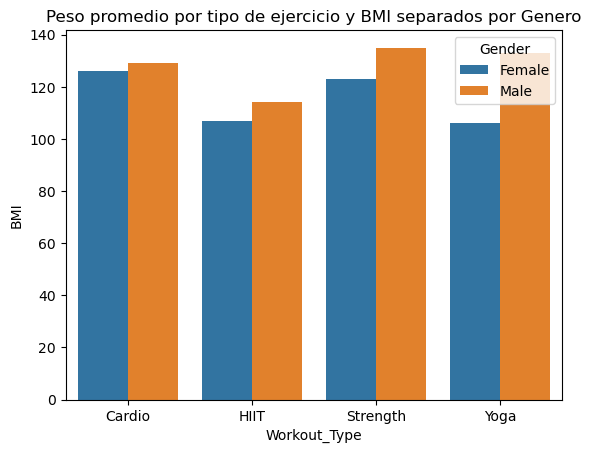

In [23]:
plt.figure()
sns.barplot(data=df_grouped2, x='Workout_Type', y='BMI', hue='Gender')
plt.title('Peso promedio por tipo de ejercicio y BMI separados por Genero')